In [74]:
import numpy as np
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt

In [75]:
result_path = Path("./results/history.jsonl")
result_path.exists()

True

In [76]:
csv_path = Path("./results/history.csv")

# load data

In [77]:
raw_data = []
with open(result_path, "r") as f:
    for line in f:
        raw_data.append(json.loads(line))
len(raw_data)

222

In [78]:
raw_data[0]

{'camera0': {'cycle_results': {'0': {'image_timestamp': 'camera0--image--20241021-165151.041802--0',
    'box': [2465, 1357, 2793, 1685],
    'center': [2629.1074966142296, 1520.1808124967301],
    'radii': [63.5075143951323, 137.26289676615352],
    'distance': 1222.0486339410622,
    'exposure_time': 40000,
    'offset': [0, 0]},
   '1': {'image_timestamp': 'camera0--image--20241021-165151.041802--1',
    'box': [2043, 1363, 2380, 1700],
    'center': [2210.9626884147683, 1531.279073870259],
    'radii': [66.72136269491943, 136.77531759742052],
    'distance': 1226.4050153961,
    'exposure_time': 40000,
    'offset': [0, 0]}},
  'pixel_move_result': {'0': [0, 0], '1': [0, 0]},
  'pixel_move_result_without_ref': {'0': [0, 0], '1': [0, 0]},
  'real_move_result': {'0': [0, 0], '1': [0, 0]},
  'real_move_result_without_ref': {'0': [0, 0], '1': [0, 0]}},
 'temperature': {},
 'is_temp_stable': False,
 'time': '2024-10-21 16:51:51'}

In [110]:
for data in raw_data:
    camera0: dict = data["camera0"]
    pixel_move_result: dict = camera0["pixel_move_result"]
    print(pixel_move_result)

    break

{'0': [0, 0], '1': [0, 0]}
[0, 0, 0, 0]


In [118]:
pixel_move_results = []
pixel_move_results_without_ref = []
real_move_results = []
real_move_results_without_ref = []
is_temp_stable_results = []
times = []
for data in raw_data:
    camera0: dict = data["camera0"]

    pixel_move_result: dict = camera0["pixel_move_result"]
    pixel_move_result = dict(sorted(pixel_move_result.items(), key=lambda x: x[0]))
    pixel_move_results.append(
        [i for v in pixel_move_result.values() for i in v]
    )

    pixel_move_result_without_ref: dict = camera0["pixel_move_result_without_ref"]
    pixel_move_result_without_ref = dict(sorted(pixel_move_result_without_ref.items(), key=lambda x: x[0]))
    pixel_move_results_without_ref.append(
        [i for v in pixel_move_result_without_ref.values() for i in v]
    )

    real_move_result: dict = camera0["real_move_result"]
    real_move_result = dict(sorted(real_move_result.items(), key=lambda x: x[0]))
    real_move_results.append(
        [i for v in real_move_result.values() for i in v]
    )

    real_move_result_without_ref: dict = camera0["real_move_result_without_ref"]
    real_move_result_without_ref = dict(sorted(real_move_result_without_ref.items(), key=lambda x: x[0]))
    real_move_results_without_ref.append(
        [i for v in real_move_result_without_ref.values() for i in v]
    )

    is_temp_stable: bool = data["is_temp_stable"]
    is_temp_stable_results.append([is_temp_stable])

    time = data["time"]
    times.append([time])

In [119]:
concat_results = np.concatenate(
    (
        pixel_move_results,
        pixel_move_results_without_ref,
        real_move_results,
        real_move_results_without_ref,
        is_temp_stable_results,
        times,
    ),
    axis=1,
)
concat_results.shape

(222, 18)

In [120]:
df = pd.DataFrame(
    concat_results,
    columns=[
        "pixel_move_0_x",
        "pixel_move_0_y",
        "pixel_move_1_x",
        "pixel_move_1_y",
        "pixel_move_without_ref_0_x",
        "pixel_move_without_ref_0_y",
        "pixel_move_without_ref_1_x",
        "pixel_move_without_ref_1_y",
        "real_move_0_x",
        "real_move_0_y",
        "real_move_1_x",
        "real_move_1_y",
        "real_move_without_ref_0_x",
        "real_move_without_ref_0_y",
        "real_move_without_ref_1_x",
        "real_move_without_ref_1_y",
        "is_temp_stable",
        "time",
    ],
)
df.head()

,pixel_move_0_x,pixel_move_0_y,pixel_move_1_x,pixel_move_1_y,pixel_move_without_ref_0_x,pixel_move_without_ref_0_y,pixel_move_without_ref_1_x,pixel_move_without_ref_1_y,real_move_0_x,real_move_0_y,real_move_1_x,real_move_1_y,real_move_without_ref_0_x,real_move_without_ref_0_y,real_move_without_ref_1_x,real_move_without_ref_1_y,is_temp_stable,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,2024-10-21 16:51:51
1,-0.17051497458396625,0.03528281295803026,-0.299534270507138,0.1490371950512781,-0.17051497458396625,0.03528281295803026,-0.299534270507138,0.1490371950512781,-0.0404,0.0084,-0.0712,0.0354,-0.0404,0.0084,-0.0712,0.0354,False,2024-10-21 16:52:03
2,-0.28248681539935205,-0.19485397965399898,-0.3199593479180294,-0.012751970466069906,-0.28248681539935205,-0.19485397965399898,-0.3199593479180294,-0.012751970466069906,-0.0669,-0.0461,-0.076,-0.003,-0.0669,-0.0461,-0.076,-0.003,False,2024-10-21 16:52:18
3,-0.08400285254947448,0.04118410416367624,0.02339792043039779,-0.11956188914928134,-0.08400285254947448,0.04118410416367624,0.02339792043039779,-0.11956188914928134,-0.0199,0.0098,0.0056,-0.0284,-0.0199,0.0098,0.0056,-0.0284,False,2024-10-21 16:52:33
4,-0.09386283629464742,0.09477139547880142,-0.29573709695523576,-0.23047952465140042,-0.09386283629464742,0.09477139547880142,-0.29573709695523576,-0.23047952465140042,-0.0222,0.0224,-0.0703,-0.0548,-0.0222,0.0224,-0.0703,-0.0548,False,2024-10-21 16:52:48


In [121]:
df.to_csv(csv_path)

# draw

Text(0.5, 1.0, 'Pixel Move')

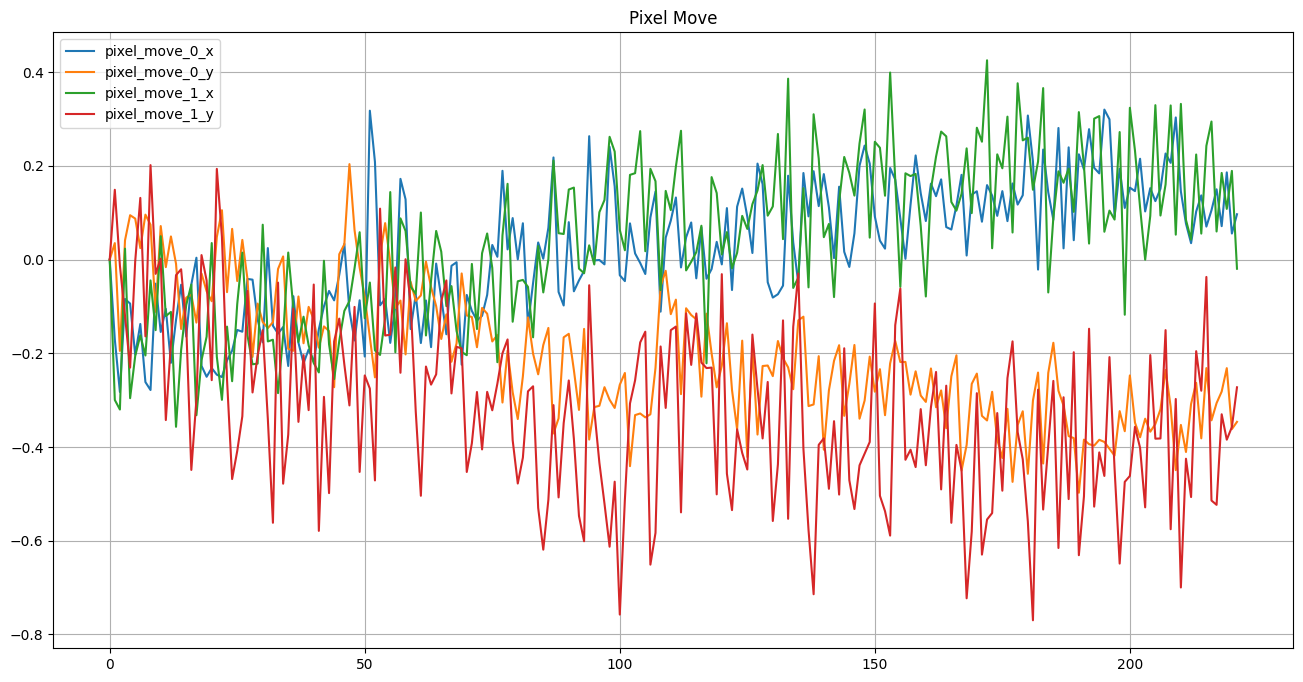

In [115]:
df[["pixel_move_0_x", "pixel_move_0_y", "pixel_move_1_x", "pixel_move_1_y"]].plot(figsize=(16, 8))
plt.grid()
plt.legend()
plt.title("Pixel Move")

Text(0.5, 1.0, 'Pixel Move Without Reference')

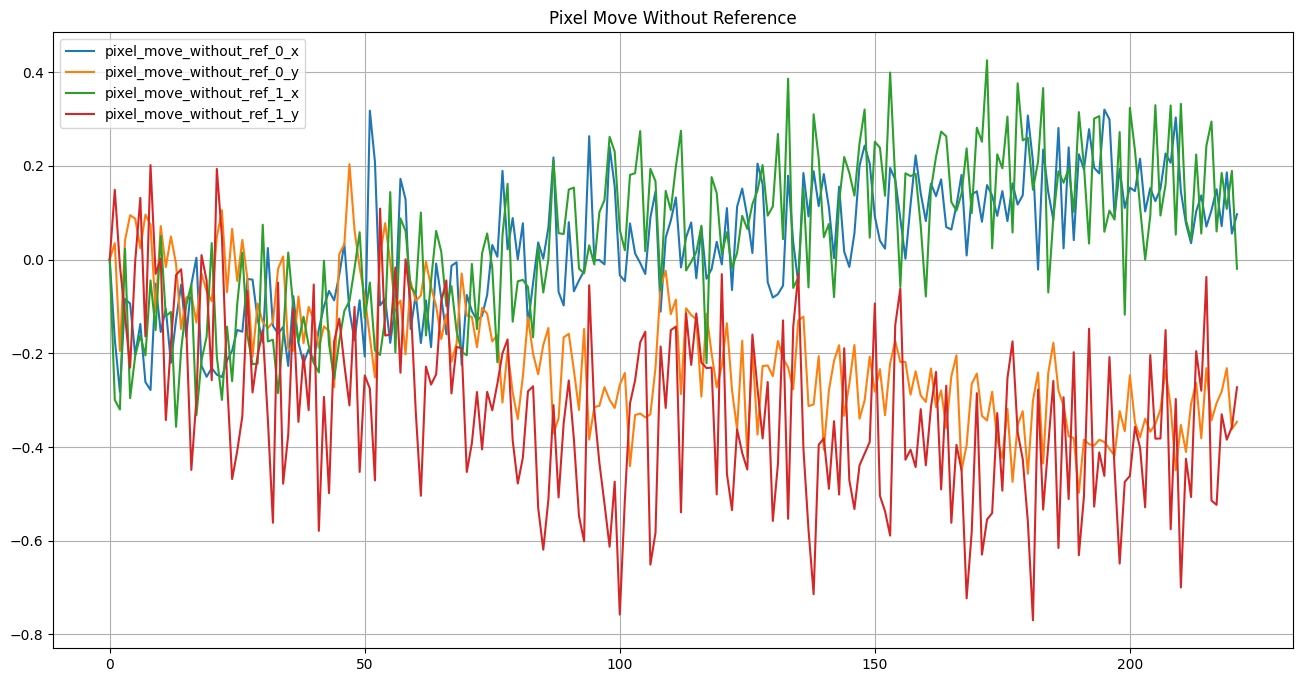

In [116]:
df[["pixel_move_without_ref_0_x", "pixel_move_without_ref_0_y", "pixel_move_without_ref_1_x", "pixel_move_without_ref_1_y"]].plot(figsize=(16, 8))
plt.grid()
plt.legend()
plt.title("Pixel Move Without Reference")

Text(0.5, 1.0, 'Real Move')

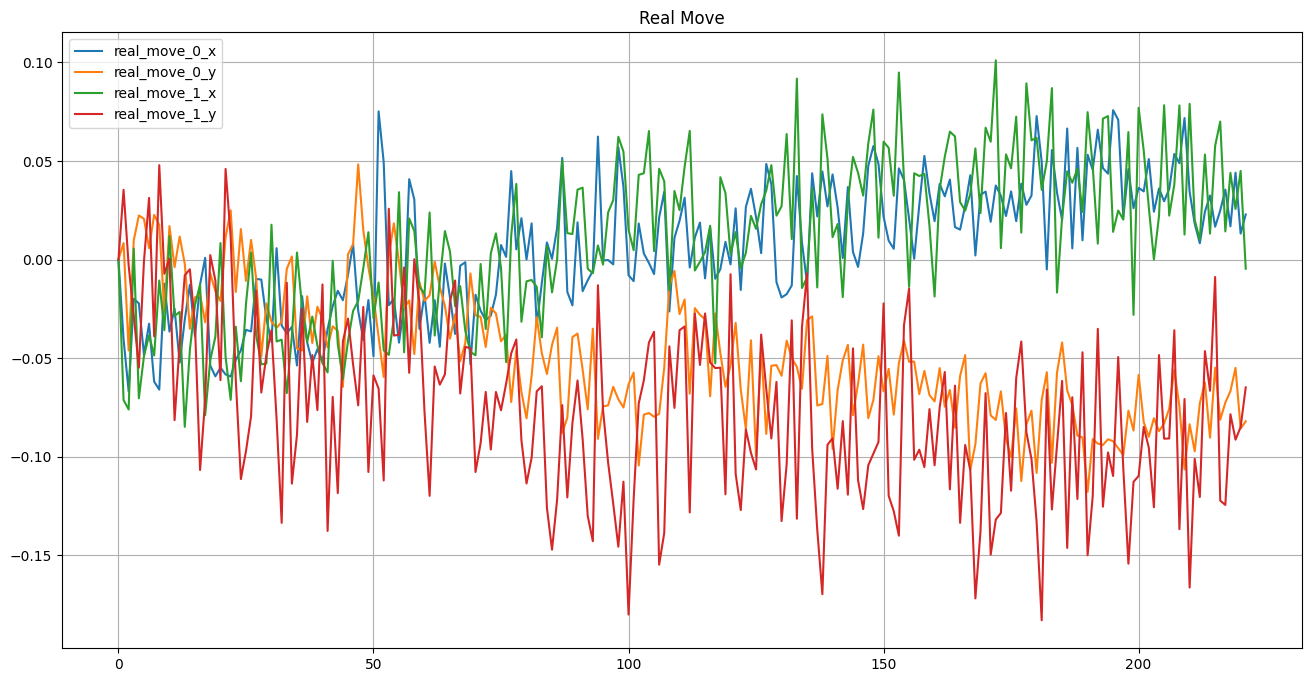

In [117]:
df[["real_move_0_x", "real_move_0_y", "real_move_1_x", "real_move_1_y"]].plot(figsize=(16, 8))
plt.grid()
plt.legend()
plt.title("Real Move")

Text(0.5, 1.0, 'Real Move Without Reference')

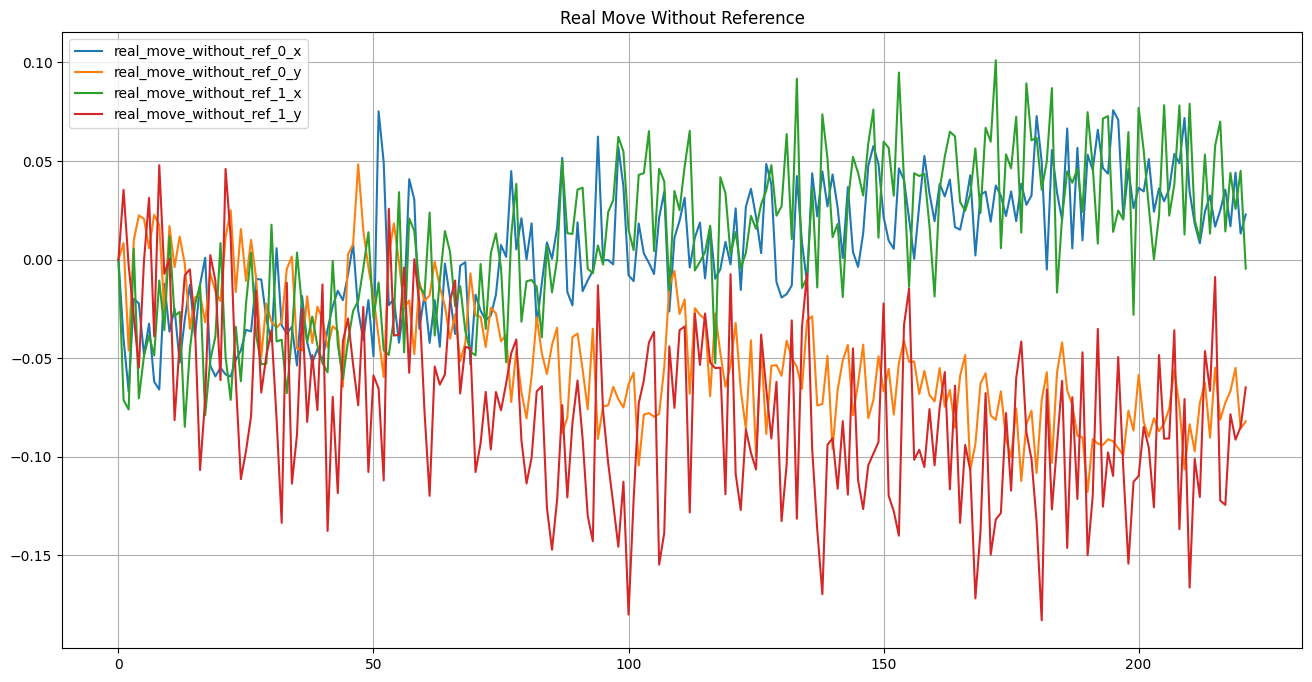

In [86]:
df[["real_move_without_ref_0_x", "real_move_without_ref_0_y", "real_move_without_ref_1_x", "real_move_without_ref_1_y"]].plot(figsize=(16, 8))
plt.grid()
plt.legend()
plt.title("Real Move Without Reference")